In [2]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

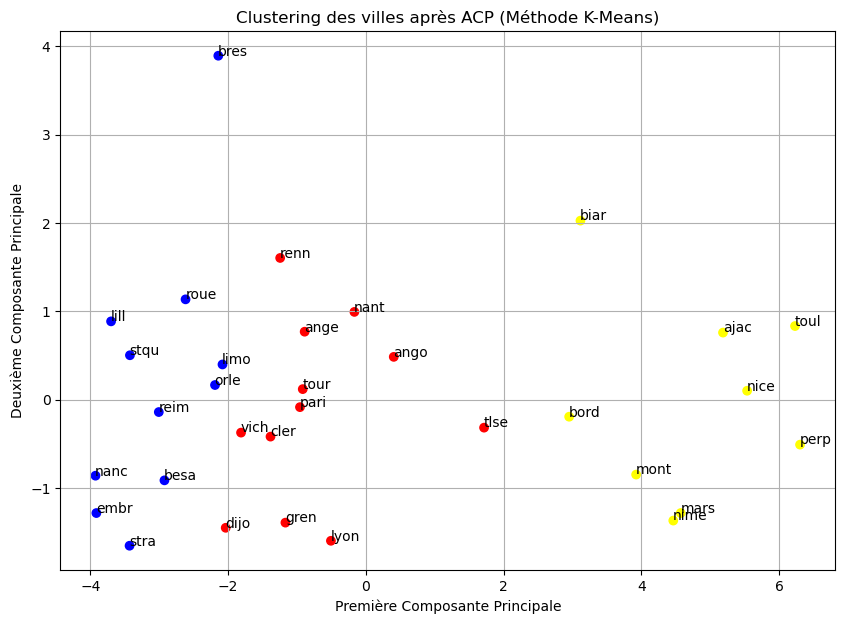

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings


# Chargement des données depuis le fichier CSV
file_path = './villes.csv' 
data = pd.read_csv(file_path, sep=';')

# Séparation des étiquettes (première colonne) et des données numériques
labels = data.iloc[:, 0].values  # Extraction des noms des villes
X = data.iloc[:, 1:].values  # Extraction des valeurs numériques

# Standardisation des données (centrage-réduction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de l'Analyse en Composantes Principales (ACP)
pca = PCA(n_components=2)  # On réduit à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)  # Transformation des données

# Application du clustering K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3)  # Initialisation avec 3 clusters
clustering = kmeans.fit_predict(X_scaled)  # Affectation des clusters aux données

#Couleurs pour chaque cluster
colors = ['red', 'yellow', 'blue']

# Création de la figure
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering,
            cmap=mcolors.ListedColormap(colors))

# Ajout des labels des villes sur le graphique
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

# Titre et axes
plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Clustering des villes après ACP (Méthode K-Means)')
plt.grid(True)

# Affichage du graphique
plt.show()
